# Create and save D2C maps for all MRS bands  
In this notebook we create and save the D2C maps for each MRS band. These maps are then called from the specified folder (rather than simulated every time, which takes non-negligible time).  
  
Notebook creation date: 1st of March 2018  
Author: Ioannis Argyriou (Institute of Astronomy, KUL)  
Email: ioannis.argyriou@kuleuven.be

## > Import modules

In [1]:
from distortionMaps import d2cMapping

from matplotlib import pyplot as plt
%matplotlib notebook

frame = (18,6) # figsize parameter dimensions for plotting

## > Get data

In [2]:
# Define paths to data
workDir = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir  = workDir+'cdp_data/CDP8/'

# Get data
MRSbands = ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']

## > Modeling

In [3]:
import pickle
def save_obj(obj,name,path='' ):
    with open(path+name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name,path='' ):
    with open(path+name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
for slice_transm in ['10pc','20pc','30pc','40pc','50pc','60pc','70pc','80pc','90pc']:
    for band in MRSbands:
#         print 'Band {}'.format(band)
        d2cMaps  = d2cMapping(band,cdpDir,slice_transmission=slice_transm,fileversion = "8B.05.00")
        save_obj(d2cMaps,'d2cMaps_band{}_tr{}'.format(band,slice_transm))

## > Visualization

<IPython.core.display.Javascript object>


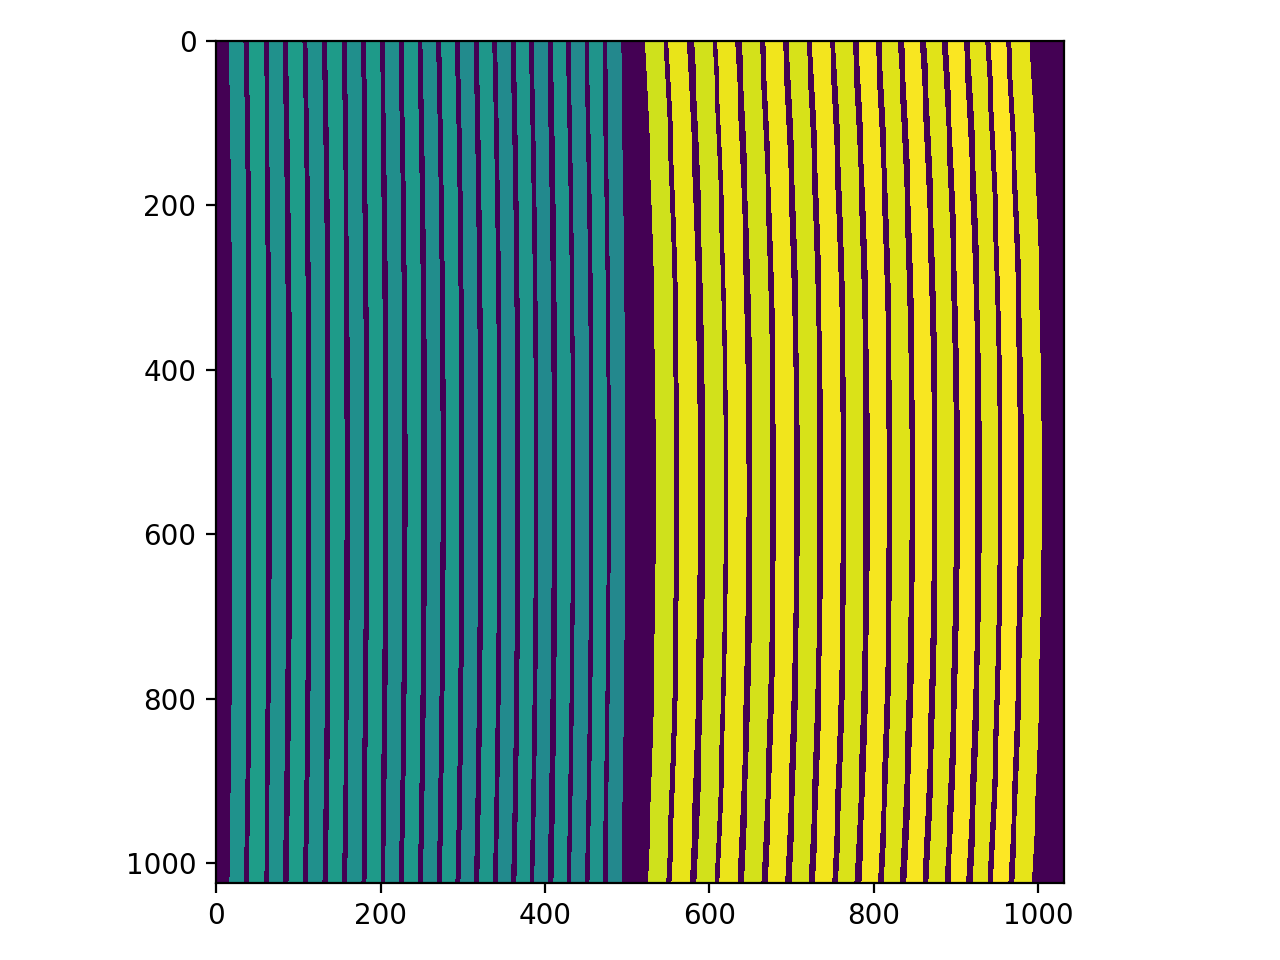

In [6]:
d2cMaps_band1A = load_obj('d2cMaps_band1A_tr90pc')

plt.figure()
plt.imshow(d2cMaps_band1A['sliceMap'])
plt.tight_layout()